
This notebook uses functions defined inside the `find_clusters.py` file

In [62]:
import os
import time
import multiprocessing

import pandas as pd
import seaborn
from matplotlib import pyplot as plt
%matplotlib inline

from find_clusters import run_analysis

In [2]:
LABEL = 'test03'
SAMPLING_RATES = [0.01, 0.05, 0.1]
CUTOFFS = [700, 750, 800, 900, 1000]
RESULTS_PATH   = os.path.abspath( '../results' )
SIM_PARAMS = { 'sim_time':3650 }
RAND_SEEDS = list( range(0, 500, 10) )

In [3]:
# Create output directory and file name prefix
results_dir = os.path.join( RESULTS_PATH, LABEL )
if os.path.exists( results_dir ):
    print( '... the directory ', results_dir )
    print( '    already exists. Simulation results may overwrite files in' )
    print( '    this directory.' )
    if input( '    Do you want to continue? [y/N] ' ) != 'y':
        raise Exception('stopping execution')
else:
    os.makedirs( results_dir )

output_prefix = results_dir + '/' + LABEL

... the directory  /home/rnunez/work/clustersim/dev/20230720-with-phylomodels/results/test03
    already exists. Simulation results may overwrite files in
    this directory.


    Do you want to continue? [y/N]  y


In [4]:
n_processes = max( int(multiprocessing.cpu_count()/2 - 2), 1 )

def analysis_worker( rand_seed ):
    params = SIM_PARAMS
    params['seed'] = rand_seed
    run_analysis( SAMPLING_RATES, CUTOFFS, params, output_prefix )
    return 

In [5]:
timeout = 3600
tasks = RAND_SEEDS
procs = []
while (len(tasks) > 0) or (len(procs) > 0):
    if (len(tasks) > 0) and (len(procs) < n_processes): 
        rs = tasks.pop(0)
        p = multiprocessing.Process( target=analysis_worker, args=(rs,) )
        p.start()
        procs.append( {'rs':rs, 'p':p, 't':time.time()+timeout} )
    for d in procs:
        if not d['p'].is_alive():
            procs.remove(d)
            print( '\n... analysis with rand_seed = ', d['rs'], ' : DONE' )
        elif d['t'] < time.time():
            d['p'].terminate()
            procs.remove(d)
            print( '\n... analysis with rand_seed = ', d['rs'], ' : TIMEOUT' )
    time.sleep(0.05)

  |==========================                        |  52%
  |=============================                     |  58%
... analysis with rand_seed =  20  : DONE
  |====                                              |   8%
  |===================                               |  39%
... analysis with rand_seed =  90  : DONE
  |=================                                 |  34%
  |==================================================| 100%
  |================================================= |  97%
  |====================                              |  41%
  |==================                                |  35%
... analysis with rand_seed =  140  : DONE
  |===============                                   |  31%
... analysis with rand_seed =  150  : DONE
  |==============                                    |  27%
... analysis with rand_seed =  100  : DONE
  |=====                                             |  11%
... analysis with rand_seed =  50  : DONE
  |==================    

Process Process-18:
Traceback (most recent call last):
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_3253381/2887974149.py", line 6, in analysis_worker
    run_analysis( SAMPLING_RATES, CUTOFFS, params, output_prefix )
  File "/home/rnunez/work/clustersim/dev/20230720-with-phylomodels/python/find_clusters.py", line 98, in run_analysis
    full_tree = build_tree( population_summary )
  File "/home/rnunez/work/clustersim/dev/20230720-with-phylomodels/python/find_clusters.py", line 219, in build_tree
    tree = transform_joinTrees( seeds_phylo )
  File "/home/rnunez/work/clustersim/envs/clustersim_phylomodels_20230720/src/phylomodels/phylomodels/trees/transform_joinTrees.py", line 145, in transform_joinTrees
    tree

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |=======                                           |  13%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |==============================================    |  91%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |===========================                       |  55%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |=======                                           |  14%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |============================================      |  87%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |==========================================        |  83%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |====================================              |  71%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |==========================                        |  51%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)


  |============================                      |  55%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/env

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |==============================================    |  92%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |============================                      |  56%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |==================================                |  68%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |=============================                     |  57%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |=======                                           |  15%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |==============                                    |  29%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |==============================                    |  60%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |==========================                        |  52%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)


  |============================                      |  57%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |==========                                        |  21%
  |============                                      |  25%
... analysis with rand_seed =  220  : DONE
  |===========                                       |  23%
  |===================                               |  37%
... analysis with rand_seed =  260  : DONE
  |==================                                |  37%
  |================================================= |  99%
... analysis with rand_seed =  0  : DONE
  |===============                                   |  31%
  |====================================              |  71%
... analysis with rand_seed =  10  : DONE
  |==================                                |  35%
  |=====================                             |  41%
... analysis with rand_seed =  310  : DONE
  |=================================                 |  66%
  |===========================                       |  54%
... analysis with rand_seed =  240  : DONE
  |==============        

Process Process-13:
Traceback (most recent call last):
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_3253381/2887974149.py", line 6, in analysis_worker
    run_analysis( SAMPLING_RATES, CUTOFFS, params, output_prefix )
  File "/home/rnunez/work/clustersim/dev/20230720-with-phylomodels/python/find_clusters.py", line 98, in run_analysis
    full_tree = build_tree( population_summary )
  File "/home/rnunez/work/clustersim/dev/20230720-with-phylomodels/python/find_clusters.py", line 219, in build_tree
    tree = transform_joinTrees( seeds_phylo )
  File "/home/rnunez/work/clustersim/envs/clustersim_phylomodels_20230720/src/phylomodels/phylomodels/trees/transform_joinTrees.py", line 145, in transform_joinTrees
    tree

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |================================                  |  63%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)


  |==========================================        |  84%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)


  |====================================              |  73%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/env

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |========================================          |  80%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |============                                      |  25%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |===========================                       |  53%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)


  |================================                  |  64%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/env

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)


  |=============                                     |  25%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/env

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |=============================                     |  57%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |=============                                     |  26%
... analysis with rand_seed =  120  : DONE
  |                                                        

IOPub message rate exceeded.
The Jupyter server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--ServerApp.iopub_msg_rate_limit`.

Current values:
ServerApp.iopub_msg_rate_limit=1000.0 (msgs/sec)
ServerApp.rate_limit_window=3.0 (secs)



  |===================                               |  39%
  |==========================================        |  84%
... analysis with rand_seed =  40  : DONE
  |================================                  |  65%
  |===================                               |  39%
... analysis with rand_seed =  330  : DONE
  |==================================================| 100%
  |================================================= |  97%
... analysis with rand_seed =  370  : DONE
  |============                                      |  24%
  |===============                                   |  29%

Process Process-36:
Traceback (most recent call last):
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_3253381/2887974149.py", line 6, in analysis_worker
    run_analysis( SAMPLING_RATES, CUTOFFS, params, output_prefix )
  File "/home/rnunez/work/clustersim/dev/20230720-with-phylomodels/python/find_clusters.py", line 98, in run_analysis
    full_tree = build_tree( population_summary )
  File "/home/rnunez/work/clustersim/dev/20230720-with-phylomodels/python/find_clusters.py", line 219, in build_tree
    tree = transform_joinTrees( seeds_phylo )
  File "/home/rnunez/work/clustersim/envs/clustersim_phylomodels_20230720/src/phylomodels/phylomodels/trees/transform_joinTrees.py", line 145, in transform_joinTrees
    tree

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |==============================================    |  91%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |===============                                   |  30%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |===================================               |  69%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)


  |===============                                   |  31%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |==============================================    |  92%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |================                                  |  31%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |================                                  |  32%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)


  |================                                  |  33%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)


  |===============================================   |  93%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)


  |=================                                 |  33%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |==============================================    |  93%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |=================                                 |  34%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |========================================          |  79%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/env

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |=====================                             |  41%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |=================                                 |  35%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/env

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |===============================================   |  93%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |==================                                |  35%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)


  |==================                                |  36%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/env

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |================================================= |  99%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)


  |====================================              |  73%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/env

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)


  |===============================================   |  94%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |=======                                           |  14%

Process Process-29:
Traceback (most recent call last):
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_3253381/2887974149.py", line 6, in analysis_worker
    run_analysis( SAMPLING_RATES, CUTOFFS, params, output_prefix )
  File "/home/rnunez/work/clustersim/dev/20230720-with-phylomodels/python/find_clusters.py", line 112, in run_analysis
    sampled_tree = full_tree.copy( 'deepcopy' )
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/site-packages/ete3/coretype/tree.py", line 1435, in copy
    new_node = copy.deepcopy(self)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/cl

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |======================                            |  44%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |=======                                           |  15%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |================================================= |  97%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |======================                            |  45%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |========                                          |  15%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |=====================                             |  42%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |=======================                           |  45%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |========                                          |  16%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)


  |================================================= |  98%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/env

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |=======================                           |  46%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |========                                          |  17%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)


  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |=========================================         |  82%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |=======================                           |  47%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)


  |=========                                         |  18%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/env

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |========================                          |  47%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |================================================= |  99%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |========================                          |  48%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |=========                                         |  19%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |=====================================             |  75%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |==========                                        |  19%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |==================================================|  99%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |========================                          |  49%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |==========                                        |  20%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |=========================                         |  49%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |========================================          |  81%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |=========================                         |  50%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)


  |==================================================| 100%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/env

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |==================================================| 100%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |==========                                        |  21%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)


  |=========================                         |  51%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/env

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |===========                                       |  21%
... analysis with rand_seed =  280  : DONE
  |============================                      |  57%
  |==============================                    |  60%
... analysis with rand_seed =  360  : DONE
  |===========================================       |  87%
... analysis with rand_seed =  110  : DONE
  |==========================================        |  85%
  |========                                          |  17%
... analysis with rand_seed =  380  : DONE
  |=============                                     |  25%
  |=======================================           |  79%

Process Process-4:
Traceback (most recent call last):
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_3253381/2887974149.py", line 6, in analysis_worker
    run_analysis( SAMPLING_RATES, CUTOFFS, params, output_prefix )
  File "/home/rnunez/work/clustersim/dev/20230720-with-phylomodels/python/find_clusters.py", line 98, in run_analysis
    full_tree = build_tree( population_summary )
  File "/home/rnunez/work/clustersim/dev/20230720-with-phylomodels/python/find_clusters.py", line 219, in build_tree
    tree = transform_joinTrees( seeds_phylo )
  File "/home/rnunez/work/clustersim/envs/clustersim_phylomodels_20230720/src/phylomodels/phylomodels/trees/transform_joinTrees.py", line 145, in transform_joinTrees
    trees

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |================                                  |  32%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)


  |=======================                           |  46%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |===============                                   |  30%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |===================================               |  71%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |====================================              |  71%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |================                                  |  33%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)


  |========================                          |  48%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |====================================              |  72%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)


  |===============================================   |  95%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |=======================                           |  47%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |=================                                 |  33%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |==========================================        |  84%
  |========================                          |  47%
... analysis with rand_seed =  340  : DONE
  |================================================= |  98%
  |================================================  |  97%

Process Process-31:


  |                                                        

Traceback (most recent call last):


  |=============                                     |  25%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_3253381/2887974149.py", line 6, in analysis_worker
    run_analysis( SAMPLING_RATES, CUTOFFS, params, output_prefix )
  File "/home/rnunez/work/clustersim/dev/20230720-with-phylomodels/python/find_clusters.py", line 98, in run_analysis
    full_tree = build_tree( population_summary )
  File "/home/rnunez/work/clustersim/dev/20230720-with-phylomodels/python/find_clusters.py", line 219, in build_tree
    tree = transform_joinTrees( seeds_phylo )
  File "/home/rnunez/work/clustersim/envs/clustersim_phylomodels_20230720/src/phylomodels/phylomodels/trees/transform_joinTrees.py", line 145, in transform_joinTrees
    trees_copy.append(tree.copy('deepcopy'))
  File "/home/rnun

  |====================================              |  72%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/env

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |=================                                 |  34%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |================================================= |  97%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |=====================                             |  41%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |==========                                        |  21%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |===============================                   |  61%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |================================================= |  98%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |===============================                   |  62%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |===========                                       |  21%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)


  |==========================                        |  53%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |==================================================|  99%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)


  |==========================                        |  51%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/env

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |===========                                       |  22%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |=====================                             |  42%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |=================                                 |  35%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |================================================= |  99%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |===============================                   |  62%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)


  |===========================                       |  53%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/env

  |===========                                       |  23%
... analysis with rand_seed =  300  : DONE
  |====                                              |   7%
  |=============                                     |  25%
  |================================                  |  65%
... analysis with rand_seed =  390  : DONE
  |======================                            |  43%
... analysis with rand_seed =  290  : DONE
  |==============================                    |  60%
  |===============================                   |  61%
... analysis with rand_seed =  460  : DONE
  |================================================= |  97%
  |================================================= |  98%
  |===============================                   |  62%
... analysis with rand_seed =  430  : DONE
  |================================                  |  64%
... analysis with rand_seed =  480  : DONE
  |==============================                    |  61%
  |===================

Process Process-28:
Traceback (most recent call last):
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/multiprocessing/process.py", line 315, in _bootstrap
    self.run()
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/multiprocessing/process.py", line 108, in run
    self._target(*self._args, **self._kwargs)
  File "/tmp/ipykernel_3253381/2887974149.py", line 6, in analysis_worker
    run_analysis( SAMPLING_RATES, CUTOFFS, params, output_prefix )
  File "/home/rnunez/work/clustersim/dev/20230720-with-phylomodels/python/find_clusters.py", line 98, in run_analysis
    full_tree = build_tree( population_summary )
  File "/home/rnunez/work/clustersim/dev/20230720-with-phylomodels/python/find_clusters.py", line 219, in build_tree
    tree = transform_joinTrees( seeds_phylo )
  File "/home/rnunez/work/clustersim/envs/clustersim_phylomodels_20230720/src/phylomodels/phylomodels/trees/transform_joinTrees.py", line 145, in transform_joinTrees
    tree

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)


  |======================================            |  77%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/env

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |=============================================     |  91%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)


  |========================================          |  80%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_2

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |======================================            |  75%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/r

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |=======================================           |  77%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)


  |================================                  |  65%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/env

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |=======================================           |  78%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)


  |======================================            |  76%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/

  |                                                        

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))


  |=======================================           |  79%

  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 270, in _reconstruct
    state = deepcopy(state, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 230, in _deepcopy_dict
    y[deepcopy(key, memo)] = deepcopy(value, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 146, in deepcopy
    y = copier(x, memo)
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 205, in _deepcopy_list
    append(deepcopy(a, memo))
  File "/home/rnunez/anaconda3/envs/clustersim_20230720/lib/python3.9/copy.py", line 172, in deepcopy
    y = _reconstruct(x, memo, *rv)
  File "/home/rnunez/anaconda3/envs/c

  |=================================                 |  65%
... analysis with rand_seed =  270  : DONE
  |==================================================| 100%
  |==========================================        |  85%
... analysis with rand_seed =  490  : DONE
  |===========================================       |  86%
  |============================================      |  89%

... analysis with rand_seed =  440  : DONE
  |============================================      |  87%
... analysis with rand_seed =  450  : DONE
  |==============================================    |  93%
  |===============================================   |  95%
  |================================================  |  95%
... analysis with rand_seed =  470  : DONE
  |=====================================             |  74%
... analysis with rand_seed =  130  : DONE
  |==================================================| 100%
  |==================================================|  99%
... analysis with ran

In [6]:
all_results_files = os.listdir(results_dir)
clustering_files = [ k for k in all_results_files if 'cluster_info' in k ]

['test03--sim_time_3650--seed_450--cluster_info.csv',
 'test03--sim_time_3650--seed_310--cluster_info.csv',
 'test03--sim_time_3650--seed_260--cluster_info.csv',
 'test03--sim_time_3650--seed_460--cluster_info.csv',
 'test03--sim_time_3650--seed_410--cluster_info.csv',
 'test03--sim_time_3650--seed_160--cluster_info.csv',
 'test03--sim_time_3650--seed_470--cluster_info.csv',
 'test03--sim_time_3650--seed_220--cluster_info.csv',
 'test03--sim_time_3650--seed_60--cluster_info.csv',
 'test03--sim_time_3650--seed_480--cluster_info.csv',
 'test03--sim_time_3650--seed_180--cluster_info.csv',
 'test03--sim_time_3650--seed_400--cluster_info.csv',
 'test03--sim_time_3650--seed_290--cluster_info.csv',
 'test03--sim_time_3650--seed_40--cluster_info.csv',
 'test03--sim_time_3650--seed_370--cluster_info.csv',
 'test03--sim_time_3650--seed_390--cluster_info.csv',
 'test03--sim_time_3650--seed_20--cluster_info.csv',
 'test03--sim_time_3650--seed_190--cluster_info.csv',
 'test03--sim_time_3650--seed_3

In [24]:
cluster_data = pd.DataFrame()
for file in clustering_files:
    data_this_file = pd.read_csv( results_dir + '/' + file )
    cluster_data = pd.concat( [cluster_data, data_this_file], ignore_index=True )

In [26]:
cluster_data.head()
#len(cluster_data)


,Unnamed: 0,index,sampling_rate,cutoff,n_clusters,avg_cluster_size,rand_seed,n_clusters_size_2,n_clusters_size_3,n_clusters_size_5,...,n_clusters_size_82,n_clusters_size_117,n_clusters_size_76,n_clusters_size_49,n_clusters_size_221,n_clusters_size_45,n_clusters_size_32,n_clusters_size_130,n_clusters_size_43,n_clusters_size_78
0,0,0,0.01,700,0,0.0,450,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,0,0.01,750,1,2.0,450,1.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,0,0.01,800,3,2.0,450,3.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,3,0,0.01,900,4,2.5,450,2.0,2.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,4,0,0.01,1000,5,2.6,450,2.0,3.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [55]:
cluster_means = cluster_data.groupby( ['sampling_rate', 'cutoff'] ).mean()

In [56]:
cluster_means

Unnamed: 0  index  n_clusters  avg_cluster_size  \
sampling_rate cutoff                                                    
0.01          700            0.0    0.0    0.000000          0.000000   
              750            1.0    0.0    0.302326          0.465116   
              800            2.0    0.0    0.906977          0.827519   
              900            3.0    0.0    2.116279          1.205749   
              1000           4.0    0.0    3.023256          1.431109   
0.05          700            5.0    0.0    0.000000          0.000000   
              750            6.0    0.0    5.837209          1.671755   
              800            7.0    0.0   14.860465          1.973371   
              900            8.0    0.0   21.976744          2.660959   
              1000           9.0    0.0   23.837209          3.155819   
0.10          700           10.0    0.0    0.000000          0.000000   
              750           11.0    0.0   23.813953          1.882379   
              800           12.0    0.0   45.348837          2.332198   
              900           13.0    0.0   48.511628          3.318307   
              1000          14.0    0.0   42.162791          4.392041   

                       rand_seed  n_clusters_size_2  n_clusters_size_3  \
sampling_rate cutoff                                                     
0.01          700     249.534884                NaN                NaN   
              750     249.534884           1.300000                NaN   
              800     249.534884           2.250000           1.000000   
              900     249.534884           3.636364           1.222222   
              1000    249.534884           4.250000           2.000000   
0.05          700     249.534884                NaN                NaN   
              750     249.534884           7.121212           1.181818   
              800     249.534884          13.756757           3.857143   
              900     249.534884          14.682927           5.062500   
              1000    249.534884          14.365854           5.676471   
0.10          700     249.534884                NaN                NaN   
              750     249.534884          24.157895           3.458333   
              800     249.534884          34.024390           8.583333   
              900     249.534884          28.046512           9.225000   
              1000    249.534884          23.511628           7.486486   

                      n_clusters_size_5  n_clusters_size_4  n_clusters_size_6  \
sampling_rate cutoff                                                            
0.01          700                   NaN                NaN                NaN   
              750                   NaN                NaN                NaN   
              800                   NaN                NaN                NaN   
              900                   NaN                NaN                NaN   
              1000             1.000000           1.000000                NaN   
0.05          700                   NaN                NaN                NaN   
              750                   NaN           1.000000                NaN   
              800              1.300000           1.875000           1.000000   
              900              2.055556           3.217391           1.384615   
              1000             1.958333           3.666667           1.545455   
0.10          700                   NaN                NaN                NaN   
              750              1.000000           1.357143           1.000000   
              800              3.375000           4.846154           1.466667   
              900              3.444444           5.827586           2.380952   
              1000             3.357143           5.892857           2.238095   

                      ...  n_clusters_size_82  n_clusters_size_117  \
sampling_rate cutoff  ...                                            
0.0

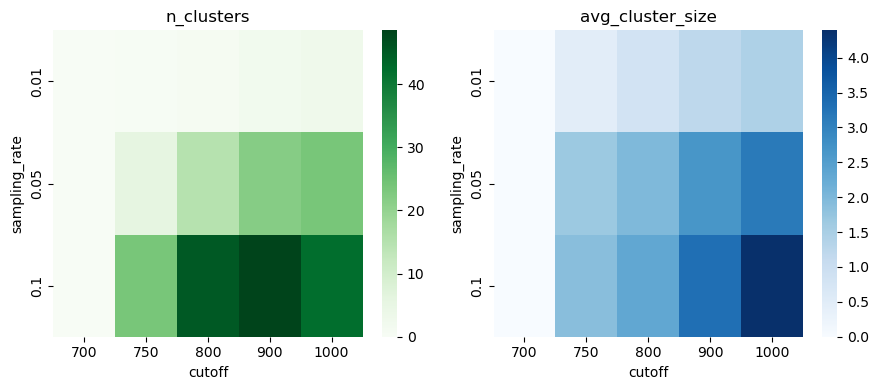

In [70]:
fig_stats, axs_stats = plt.subplots( 1, 2, figsize=(9, 4) )

seaborn.heatmap( cluster_means['n_clusters'].unstack(), 
                 cmap = 'Greens', 
                 ax   = axs_stats[0] 
                )
axs_stats[0].set_title('n_clusters')

seaborn.heatmap( cluster_means['avg_cluster_size'].unstack(), 
                 cmap = 'Blues', 
                 ax   = axs_stats[1] 
                )
axs_stats[1].set_title('avg_cluster_size')

fig_stats.tight_layout()

In [168]:
cluster_data_distributions = cluster_data.reset_index().drop( columns=['level_0', 'index','n_clusters','avg_cluster_size','rand_seed'] )
cluster_data_distributions = cluster_data_distributions.loc[:, ~cluster_data_distributions.columns.str.contains('^Unnamed')]

cluster_sizes = [ int( str(k).lstrip('n_clusters_size_') ) for k in cluster_data_distributions.columns if 'n_clusters_size_' in k ]
cluster_sizes_sorted = [ str(k) for k in sorted(cluster_sizes) ]

cluster_data_distributions['id'] = range(0,len(cluster_data_distributions))
cluster_data_distributions = cluster_data_distributions.groupby( ['id', 'sampling_rate', 'cutoff'] ).mean()

cluster_data_distributions.columns = [ int( str(k).lstrip('n_clusters_size_') ) for k in cluster_data_distributions.columns ]

cluster_distributions = cluster_data_distributions.stack().reset_index().drop(columns=['id'])
cluster_distributions = cluster_distributions.rename( {'level_3': 'cluster_size'}, axis=1 )
cluster_distributions['cluster_size'] = cluster_distributions['cluster_size'].astype(int)
cluster_distributions.columns = [*cluster_distributions.columns[:-1], 'count']
cluster_distributions

,sampling_rate,cutoff,cluster_size,count
0,0.01,750,2,1.0
1,0.01,800,2,3.0
2,0.01,900,2,2.0
3,0.01,900,3,2.0
4,0.01,1000,2,2.0
...,...,...,...,...
1485,0.05,1000,2,1.0
1486,0.10,750,2,1.0
1487,0.10,800,2,2.0
1488,0.10,900,2,5.0


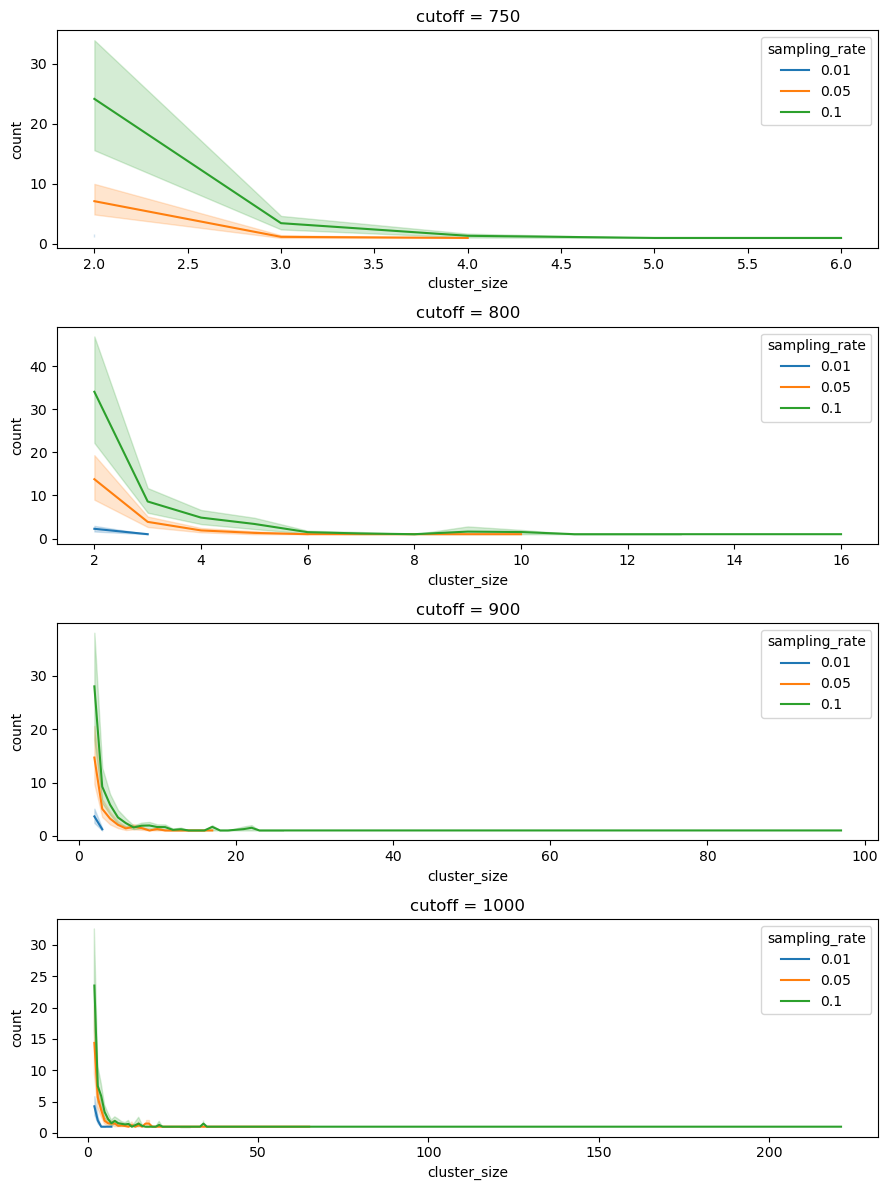

In [209]:
valid_cutoffs = cluster_distributions['cutoff'].unique()
n_cutoffs = len( valid_cutoffs )

fig_dist, axs_dist = plt.subplots( n_cutoffs, 1, figsize=(9, 12) )

for i, cutoff in enumerate(valid_cutoffs):
    seaborn.lineplot( data    = cluster_distributions[ cluster_distributions['cutoff']==cutoff ],
                      x       = 'cluster_size',
                      y       = 'count',
                      hue     = 'sampling_rate',
                      palette = 'tab10',
                      ax      = axs_dist[i]
                    )
    axs_dist[i].set_title( 'cutoff = ' + str(cutoff) )

fig_dist.tight_layout()

In [ ]:
# Next:

# % clustered if transmitter -- cutoff vs sampling rate

# % transmitting if clustering

# RR of transmitting if clustering (vs non-clustered)

# RR of transmitting if clustering (vs all)

# same but for high transmitters (more than 1 tx)